In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

In [3]:
# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'steelblue'])
bounds=[0,0.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

In [4]:
stations_df = pd.read_json('./avail_stations/info_estaciones_climavail.json')
stations_df

,latitud,provincia,altitud,indicativo,nombre,indsinop,longitud,syear_download,start_year,end_year
0,413515N,BARCELONA,74,0252D,ARENYS DE MAR,08186,023224E,2023,1951,NaN
1,411734N,BARCELONA,4,0076,BARCELONA AEROPUERTO,08181,020412E,2023,1951,NaN
2,412506N,BARCELONA,408,0200E,"BARCELONA, FABRA",,020727E,2023,1951,NaN
3,412326N,BARCELONA,6,0201D,BARCELONA,08180,021200E,2023,1951,NaN
4,414312N,BARCELONA,291,0149X,MANRESA,08174,015025E,2023,1951,NaN
...,...,...,...,...,...,...,...,...,...,...
286,280523N,STA. CRUZ DE TENERIFE,15,C329Z,SAN SEBASTIÁN DE LA GOMERA,60008,170641W,2023,1995,NaN
287,282748N,STA. CRUZ DE TENERIFE,35,C449C,STA.CRUZ DE TENERIFE,60020,161519W,2023,1931,NaN
288,283545N,STA. CRUZ DE TENERIFE,62,C129Z,TAZACORTE,60004,175455W,2023,2000,NaN
289,282839N,STA. CRUZ DE TENERIFE,632,C447A,TENERIFE NORTE AEROPUERTO,60015,161946W,2023,1941,NaN


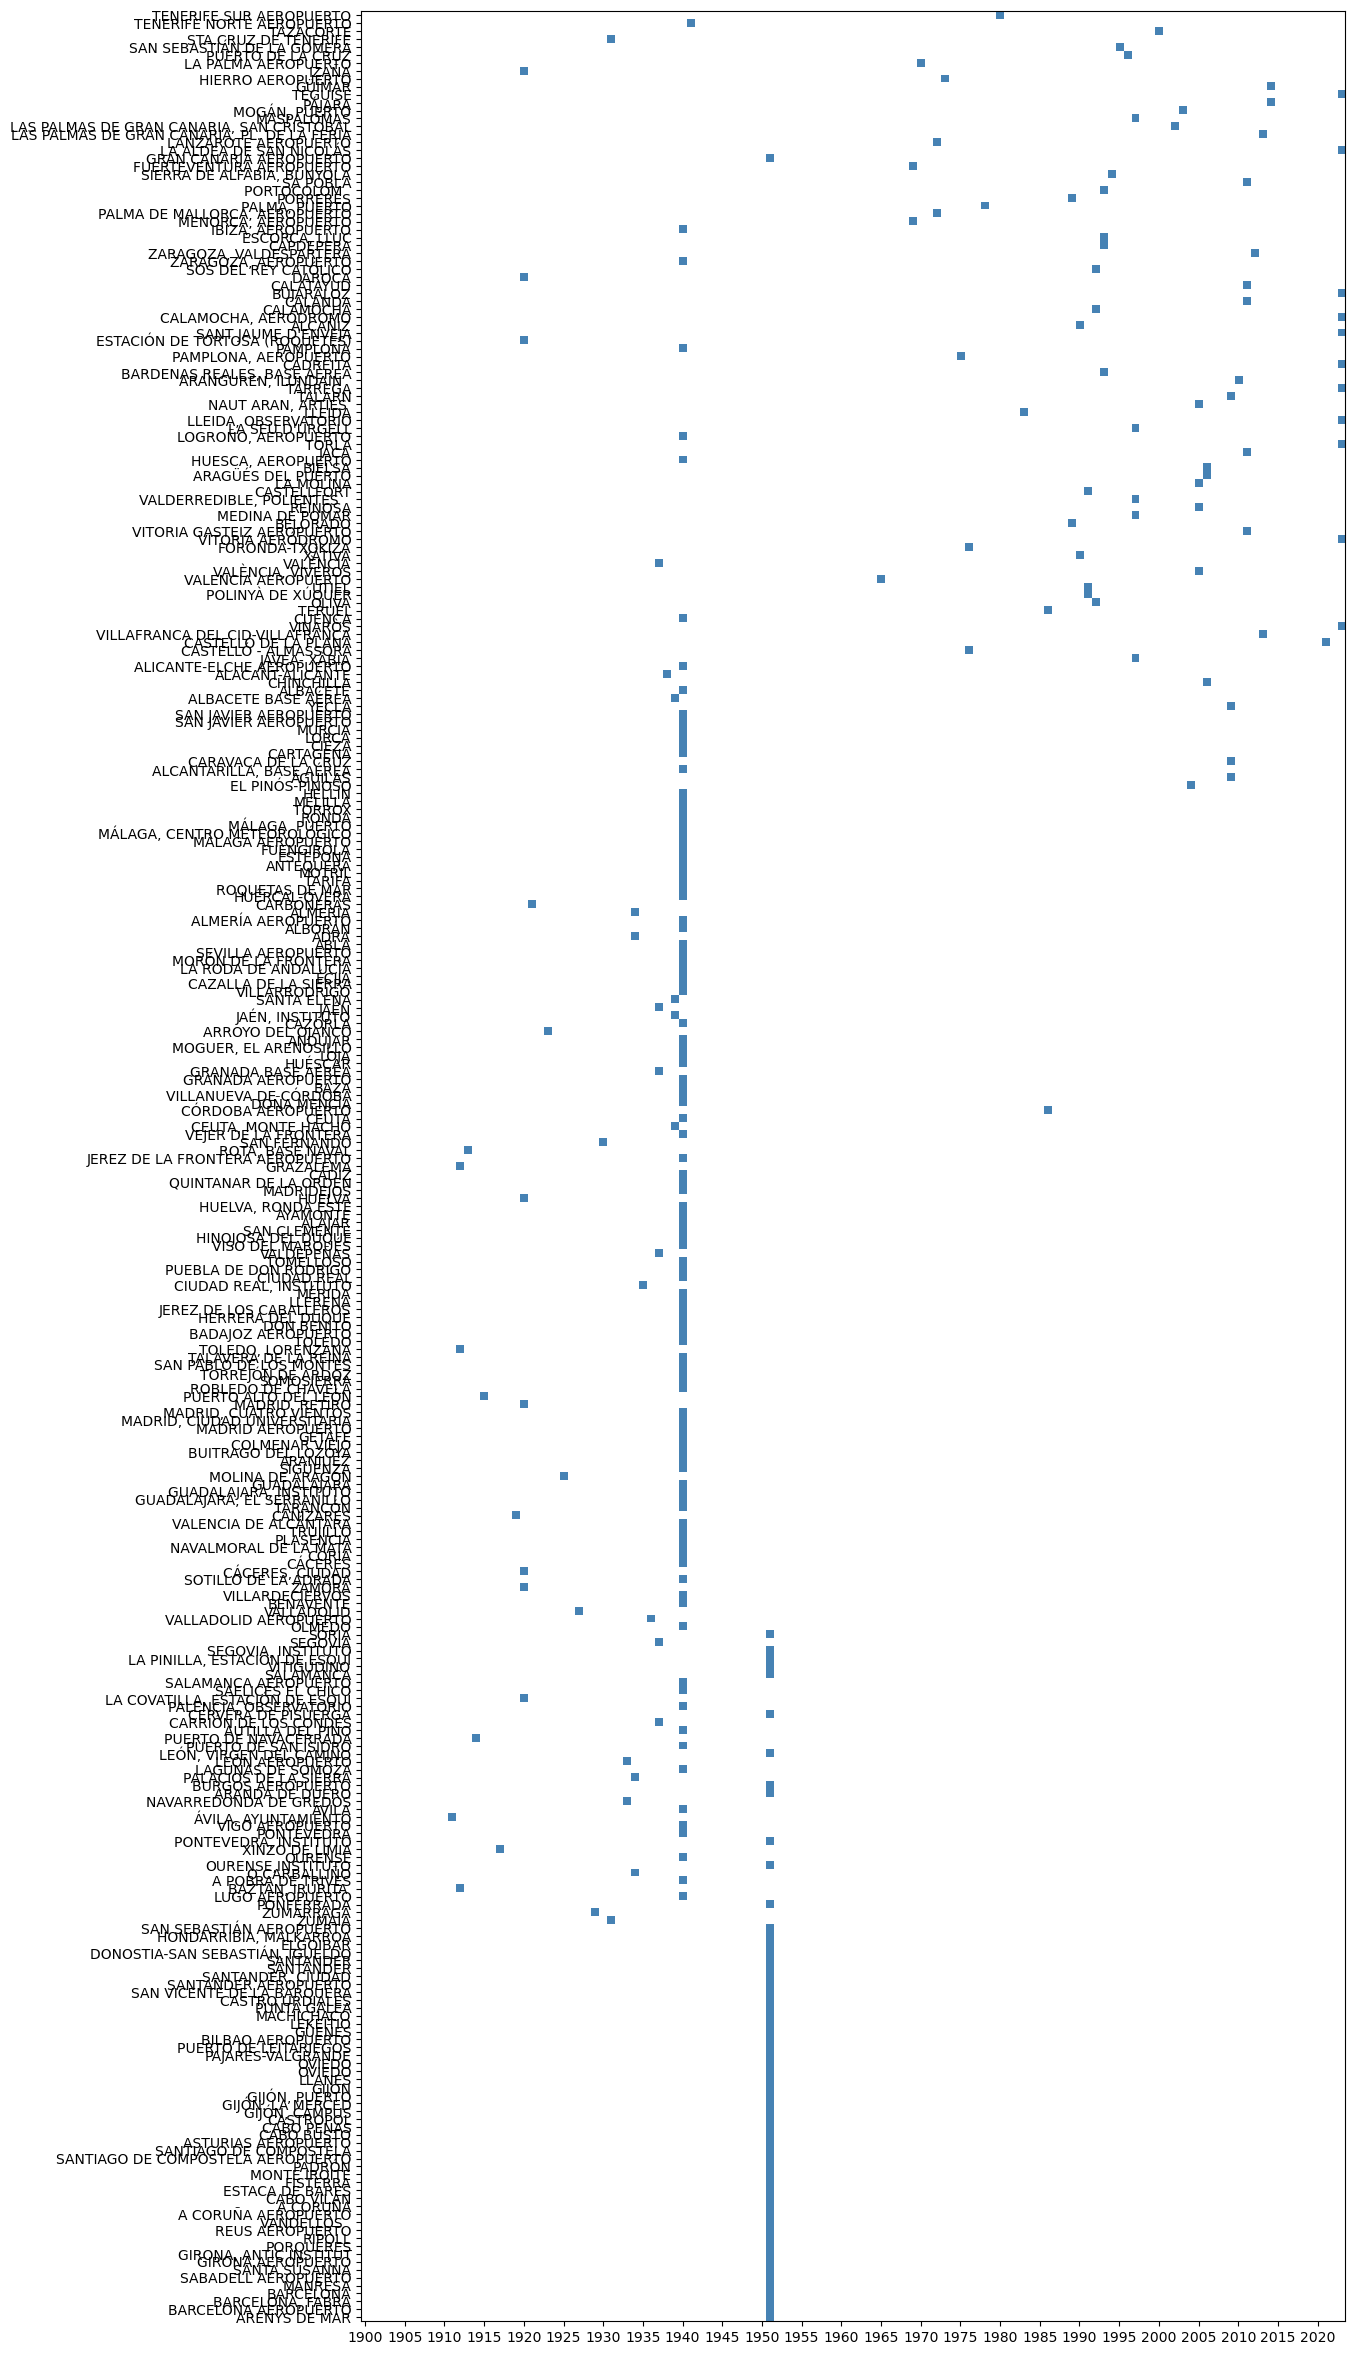

In [5]:
syear = 1900
eyear = 2022
nyears = eyear-syear+1
heatmap_arr = np.zeros((len(stations_df),nyears+1))

for nst,stn_id in enumerate(stations_df.indicativo):
    heatmap_arr[nst,int(stations_df[stations_df.indicativo==stn_id]['start_year'])-syear]=1

fig = plt.figure(figsize=(150,30))
ax=fig.add_subplot(1,1,1)
mpl.style.use('seaborn-paper')
    
im = ax.imshow(heatmap_arr,interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)
ax.set_xticks(np.arange(0,nyears,5))
ax.set_yticks(np.arange(len(stations_df)))
ax.set_xticklabels(np.arange(syear,eyear,5))
ax.set_yticklabels(stations_df.nombre)
plt.show()